In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# read data function

In [2]:
def read_abcd(path, cols, na_values):
    
    df = pd.read_csv(path, sep='\t', index_col='subjectkey', na_values=na_values)
    df = df.drop(df.index[0])
    
    for col in cols:
        df[col] = pd.to_numeric(df[col])
        df = df[cols]

    df = df.reset_index()
    df = df.sort_values(['subjectkey', 'interview_age'])
    df = df.drop_duplicates(subset=['subjectkey'], keep='first')
    df = df.drop(columns=['interview_age'])
    df = df.set_index('subjectkey')
    
    df_show = abcd_ysu02.join(df)
    df_show = df_show.drop(columns=[
        'isip_1d_2',
        'isip_5_2',
        'isip_1b_yn'
    ])
     
    for col in df_show.columns:
        print('{:<30}    n = {:<10}    mean = {:<10.4f}'.\
              format(col,  df_show[col].notnull().sum(), df_show[col].mean()))    
    print('\nsubjects:{:>10}\nfeatures:{:>10}'.format(df_show.shape[0], df_show.shape[1]))
    
    return df

# y target variable 

In [3]:
file_abcd_ysu02 = r'E:\gregn\data\ABCD\abcd3\abcd_ysu02.txt'
abcd_ysu02 = pd.read_csv(file_abcd_ysu02, sep='\t', index_col='subjectkey')
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02.index[0])
cols = [
    'interview_age',
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn'
]

for col in cols:
    abcd_ysu02[col] = pd.to_numeric(abcd_ysu02[col])
    abcd_ysu02 = abcd_ysu02[cols]
    
abcd_ysu02 = abcd_ysu02.reset_index()
abcd_ysu02 = abcd_ysu02.sort_values(['subjectkey', 'interview_age'])
abcd_ysu02 = abcd_ysu02.drop_duplicates(subset=['subjectkey'], keep='first')
abcd_ysu02 = abcd_ysu02.drop(columns=['interview_age'])
abcd_ysu02 = abcd_ysu02.set_index('subjectkey')
    
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_5_2 == 3].index) # drop accidental 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_5_2 == 2].index) # drop sneaky 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_1b_yn == 0].index) # drop religious 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_1d_2 > 10].index)

abcd_ysu02['isip_1d_2'] = abcd_ysu02['isip_1d_2'].fillna(0)

y = abcd_ysu02['isip_1d_2'].values
y = np.where(y>0, 1, y)

unique, counts = np.unique(y, return_counts=True)

print('number of subjects: {:>10}\n\n[0] never sipped: {:>12}\n[1] sipped by age 10:{:>9}'.\
      format(len(y), counts[0], counts[1]))

number of subjects:      10707

[0] never sipped:         9209
[1] sipped by age 10:     1498


# abcd_smrip101

In [4]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_smrip101.txt'

cols = [
'interview_age',
'smri_thick_cdk_banksstslh',
'smri_thick_cdk_cdacatelh',
'smri_thick_cdk_cdmdfrlh',
'smri_thick_cdk_cuneuslh',
'smri_thick_cdk_ehinallh',
'smri_thick_cdk_fusiformlh',
'smri_thick_cdk_ifpllh',
'smri_thick_cdk_iftmlh',
'smri_thick_cdk_ihcatelh',
'smri_thick_cdk_locclh',
'smri_thick_cdk_lobfrlh',
'smri_thick_cdk_linguallh',
'smri_thick_cdk_mobfrlh',
'smri_thick_cdk_mdtmlh',
'smri_thick_cdk_parahpallh',
'smri_thick_cdk_paracnlh',
'smri_thick_cdk_parsopclh',
'smri_thick_cdk_parsobislh',
'smri_thick_cdk_parstgrislh',
'smri_thick_cdk_pericclh',
'smri_thick_cdk_postcnlh',
'smri_thick_cdk_ptcatelh',
'smri_thick_cdk_precnlh',
'smri_thick_cdk_pclh',
'smri_thick_cdk_rracatelh',
'smri_thick_cdk_rrmdfrlh',
'smri_thick_cdk_sufrlh',
'smri_thick_cdk_supllh',
'smri_thick_cdk_sutmlh',
'smri_thick_cdk_smlh',
'smri_thick_cdk_frpolelh',
'smri_thick_cdk_tmpolelh',
'smri_thick_cdk_trvtmlh',
'smri_thick_cdk_insulalh',
'smri_thick_cdk_banksstsrh',
'smri_thick_cdk_cdacaterh',
'smri_thick_cdk_cdmdfrrh',
'smri_thick_cdk_cuneusrh',
'smri_thick_cdk_ehinalrh',
'smri_thick_cdk_fusiformrh',
'smri_thick_cdk_ifplrh',
'smri_thick_cdk_iftmrh',
'smri_thick_cdk_ihcaterh',
'smri_thick_cdk_loccrh',
'smri_thick_cdk_lobfrrh',
'smri_thick_cdk_lingualrh',
'smri_thick_cdk_mobfrrh',
'smri_thick_cdk_mdtmrh',
'smri_thick_cdk_parahpalrh',
'smri_thick_cdk_paracnrh',
'smri_thick_cdk_parsopcrh',
'smri_thick_cdk_parsobisrh',
'smri_thick_cdk_parstgrisrh',
'smri_thick_cdk_periccrh',
'smri_thick_cdk_postcnrh',
'smri_thick_cdk_ptcaterh',
'smri_thick_cdk_precnrh',
'smri_thick_cdk_pcrh',
'smri_thick_cdk_rracaterh',
'smri_thick_cdk_rrmdfrrh',
'smri_thick_cdk_sufrrh',
'smri_thick_cdk_suplrh',
'smri_thick_cdk_sutmrh',
'smri_thick_cdk_smrh',
'smri_thick_cdk_frpolerh',
'smri_thick_cdk_tmpolerh',
'smri_thick_cdk_trvtmrh',
'smri_thick_cdk_insularh',
'smri_thick_cdk_meanlh',
'smri_thick_cdk_meanrh',
'smri_thick_cdk_mean',
'smri_vol_cdk_banksstslh',
'smri_vol_cdk_cdacatelh',
'smri_vol_cdk_cdmdfrlh',
'smri_vol_cdk_cuneuslh',
'smri_vol_cdk_ehinallh',
'smri_vol_cdk_fusiformlh',
'smri_vol_cdk_ifpllh',
'smri_vol_cdk_iftmlh',
'smri_vol_cdk_ihcatelh',
'smri_vol_cdk_locclh',
'smri_vol_cdk_lobfrlh',
'smri_vol_cdk_linguallh',
'smri_vol_cdk_mobfrlh',
'smri_vol_cdk_mdtmlh',
'smri_vol_cdk_parahpallh',
'smri_vol_cdk_paracnlh',
'smri_vol_cdk_parsopclh',
'smri_vol_cdk_parsobislh',
'smri_vol_cdk_parstgrislh',
'smri_vol_cdk_pericclh',
'smri_vol_cdk_postcnlh',
'smri_vol_cdk_ptcatelh',
'smri_vol_cdk_precnlh',
'smri_vol_cdk_pclh',
'smri_vol_cdk_rracatelh',
'smri_vol_cdk_rrmdfrlh',
'smri_vol_cdk_sufrlh',
'smri_vol_cdk_supllh',
'smri_vol_cdk_sutmlh',
'smri_vol_cdk_smlh',
'smri_vol_cdk_frpolelh',
'smri_vol_cdk_tmpolelh',
'smri_vol_cdk_trvtmlh',
'smri_vol_cdk_insulalh',
'smri_vol_cdk_banksstsrh',
'smri_vol_cdk_cdacaterh',
'smri_vol_cdk_cdmdfrrh',
'smri_vol_cdk_cuneusrh',
'smri_vol_cdk_ehinalrh',
'smri_vol_cdk_fusiformrh',
'smri_vol_cdk_ifplrh',
'smri_vol_cdk_iftmrh',
'smri_vol_cdk_ihcaterh',
'smri_vol_cdk_loccrh',
'smri_vol_cdk_lobfrrh',
'smri_vol_cdk_lingualrh',
'smri_vol_cdk_mobfrrh',
'smri_vol_cdk_mdtmrh',
'smri_vol_cdk_parahpalrh',
'smri_vol_cdk_paracnrh',
'smri_vol_cdk_parsopcrh',
'smri_vol_cdk_parsobisrh',
'smri_vol_cdk_parstgrisrh',
'smri_vol_cdk_periccrh',
'smri_vol_cdk_postcnrh',
'smri_vol_cdk_ptcaterh',
'smri_vol_cdk_precnrh',
'smri_vol_cdk_pcrh',
'smri_vol_cdk_rracaterh',
'smri_vol_cdk_rrmdfrrh',
'smri_vol_cdk_sufrrh',
'smri_vol_cdk_suplrh',
'smri_vol_cdk_sutmrh',
'smri_vol_cdk_smrh',
'smri_vol_cdk_frpolerh',
'smri_vol_cdk_tmpolerh',
'smri_vol_cdk_trvtmrh',
'smri_vol_cdk_insularh',
'smri_vol_cdk_totallh',
'smri_vol_cdk_totalrh',
'smri_vol_cdk_total',
]

na_values = [None]
abcd_smrip101 = read_abcd(path, cols, na_values)

smri_thick_cdk_banksstslh         n = 10624         mean = 2.7982    
smri_thick_cdk_cdacatelh          n = 10623         mean = 2.8739    
smri_thick_cdk_cdmdfrlh           n = 10624         mean = 2.8674    
smri_thick_cdk_cuneuslh           n = 10623         mean = 2.0543    
smri_thick_cdk_ehinallh           n = 10624         mean = 3.4399    
smri_thick_cdk_fusiformlh         n = 10624         mean = 2.9544    
smri_thick_cdk_ifpllh             n = 10624         mean = 2.7710    
smri_thick_cdk_iftmlh             n = 10624         mean = 3.0703    
smri_thick_cdk_ihcatelh           n = 10623         mean = 2.6955    
smri_thick_cdk_locclh             n = 10624         mean = 2.3240    
smri_thick_cdk_lobfrlh            n = 10624         mean = 2.9806    
smri_thick_cdk_linguallh          n = 10623         mean = 2.1916    
smri_thick_cdk_mobfrlh            n = 10624         mean = 2.7257    
smri_thick_cdk_mdtmlh             n = 10624         mean = 3.1807    
smri_thick_cdk_parah

# acspsw03

In [5]:
path = r'E:\gregn\data\ABCD\abcd3\acspsw03.txt'

cols = [
    'interview_age',
    'rel_family_id',
]

na_values = [None]
acspsw03 = read_abcd(path, cols, na_values)

rel_family_id                     n = 10707         mean = 5921.1416 

subjects:     10707
features:         1


# join dataframes

In [6]:
dfs = [
    abcd_ysu02,
    acspsw03,
    abcd_smrip101
]

abcd = dfs[0].join(dfs[1:])
print('number of subjects:', len(abcd))

number of subjects: 10707


# X features 

In [7]:
X = abcd.drop(columns=[
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn',
    'rel_family_id'
])
print('number of features:', X.shape[1])
list(X.columns)

number of features: 142


['smri_thick_cdk_banksstslh',
 'smri_thick_cdk_cdacatelh',
 'smri_thick_cdk_cdmdfrlh',
 'smri_thick_cdk_cuneuslh',
 'smri_thick_cdk_ehinallh',
 'smri_thick_cdk_fusiformlh',
 'smri_thick_cdk_ifpllh',
 'smri_thick_cdk_iftmlh',
 'smri_thick_cdk_ihcatelh',
 'smri_thick_cdk_locclh',
 'smri_thick_cdk_lobfrlh',
 'smri_thick_cdk_linguallh',
 'smri_thick_cdk_mobfrlh',
 'smri_thick_cdk_mdtmlh',
 'smri_thick_cdk_parahpallh',
 'smri_thick_cdk_paracnlh',
 'smri_thick_cdk_parsopclh',
 'smri_thick_cdk_parsobislh',
 'smri_thick_cdk_parstgrislh',
 'smri_thick_cdk_pericclh',
 'smri_thick_cdk_postcnlh',
 'smri_thick_cdk_ptcatelh',
 'smri_thick_cdk_precnlh',
 'smri_thick_cdk_pclh',
 'smri_thick_cdk_rracatelh',
 'smri_thick_cdk_rrmdfrlh',
 'smri_thick_cdk_sufrlh',
 'smri_thick_cdk_supllh',
 'smri_thick_cdk_sutmlh',
 'smri_thick_cdk_smlh',
 'smri_thick_cdk_frpolelh',
 'smri_thick_cdk_tmpolelh',
 'smri_thick_cdk_trvtmlh',
 'smri_thick_cdk_insulalh',
 'smri_thick_cdk_banksstsrh',
 'smri_thick_cdk_cdacaterh',


# family groups 

In [8]:
from collections import defaultdict

d = defaultdict(lambda: len(d))
family_groups = [d[x] for x in abcd['rel_family_id']]
family_groups = np.array(family_groups)

# nested cross validation 

In [9]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, GroupKFold
from time import time
from datetime import timedelta
warnings.filterwarnings('ignore')

start_time = time()


model = XGBClassifier(
    tree_method = 'gpu_hist',
    objective = 'binary:logistic',
    eval_metric = 'auc',
    random_state = 42
)


params = {
    'learning_rate': [0.005, 0.01, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 500, 1000, 1500, 2000, 2500],
    'colsample_bytree': [0.4, 0.8]
}


inner_cv = GroupKFold(n_splits=5)
inner_cv = inner_cv.get_n_splits(X, y, groups=family_groups.tolist())
    
outer_cv = GroupKFold(n_splits=5)
outer_cv = outer_cv.get_n_splits(X, y, groups=family_groups.tolist())
    
    
# non_nested parameter search and scoring
gs = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    scoring='roc_auc', 
    cv=inner_cv,
    return_train_score=True,
    verbose=3
)


gs.fit(X,y)

nested_score = cross_val_score(
    gs,
    X=X, 
    y=y, 
    scoring='roc_auc', 
    cv=outer_cv,
)
print('-------------------------------------------------------------------------------')
print('\nruntime:', str(timedelta(seconds=time()-start_time)))
print('scores:', nested_score)
print('average score:', nested_score.mean())
print('std:', nested_score.std())
print('\nbest estimator:\n\n', gs.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.724, test=0.557) total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.752, test=0.577) total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.745, test=0.582) total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.736, test=0.591) total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.729, test=0.572) total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500;, score=(train=0.811, test=0.556) total time=   1.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500;, score=(train=0.

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.581) total time=  16.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.961, test=0.564) total time=   1.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.975, test=0.565) total time=   1.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.962, test=0.586) total time=   1.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.964, test=0.598) total time=   1.5s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.951, test=0.580) total time=   1.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=500;, score=(train=1.000, test=0.571) total time=   9.1s
[CV 2/5] END colsample_byt

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.553) total time=   8.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.574) total time=   8.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.903, test=0.568) total time=   0.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.927, test=0.569) total time=   0.8s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.907, test=0.584) total time=   0.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.916, test=0.594) total time=   0.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.892, test=0.582) total time=   0.8s
[CV 1/5] END colsample_bytree=0.

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.563) total time=  30.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.578) total time=  29.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.952, test=0.570) total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.949, test=0.568) total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.954, test=0.575) total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.945, test=0.579) total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.947, test=0.578) total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, le

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.541) total time=  11.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.548) total time=  12.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.561) total time=   1.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.558) total time=   1.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.557) total time=   1.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.563) total time=   1.5s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.561) total time=   1.5s
[CV 1/5] END colsample_bytree=0.4, lear

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.979, test=0.579) total time=   9.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.975, test=0.584) total time=   9.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.838, test=0.560) total time=   0.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.846, test=0.551) total time=   1.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.830, test=0.570) total time=   0.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.837, test=0.591) total time=   0.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.849, test=0.568) total time=   0.9s
[CV 1/5] END colsample_by

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.581) total time=  44.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.557) total time=  42.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.577) total time=  40.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.742, test=0.551) total time=   0.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.752, test=0.556) total time=   0.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.748, test=0.574) total time=   0.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.745, test=0.590) total time=   0.4s
[CV 5/5] END colsample_bytre

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.575) total time=  21.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.553) total time=  20.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.573) total time=  19.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.971, test=0.560) total time=   2.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.980, test=0.551) total time=   2.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.969, test=0.585) total time=   2.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.978, test=0.584) total time=   2.1s
[CV 5/5] END colsample_bytree=0

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.565) total time=   9.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.524) total time=   9.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.556) total time=   9.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=1.000, test=0.550) total time=   0.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.998, test=0.573) total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.999, test=0.569) total time=   0.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.999, test=0.551) total time=   0.8s
[CV 5/5] END colsample_bytree=0.8, lea

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.569) total time=  17.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.538) total time=  16.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.568) total time=  16.7s
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.756, test=0.573) total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.747, test=0.559) total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.754, test=0.577) total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.750

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.569) total time=  16.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.568) total time=  16.2s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.595) total time=  16.1s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.578) total time=  15.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.982, test=0.568) total time=   1.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.967, test=0.555) total time=   1.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=100;, score=(train=0.968, test=0.569) total time=   1.4s
[CV 4/5] END colsample_

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.550) total time=   8.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.565) total time=   7.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.566) total time=   8.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.579) total time=   8.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.565) total time=   7.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.932, test=0.576) total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=100;, score=(train=0.911, test=0.555) total time=   0.7s
[CV 3/5] END colsample_bytree

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.574) total time=  29.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.560) total time=  29.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.574) total time=  29.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.581) total time=  29.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.571) total time=  28.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.969, test=0.574) total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.969, test=0.553) total time=   0.3s
[CV 3/5] END colsample_bytree=0

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.560) total time=  11.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.535) total time=  10.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.554) total time=  11.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.547) total time=  11.1s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.563) total time=  11.1s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.578) total time=   1.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.532) total time=   1.4s
[CV 3/5] END colsample_bytree=0.4, l

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.988, test=0.567) total time=   9.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.989, test=0.562) total time=   9.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.991, test=0.580) total time=   9.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.988, test=0.601) total time=   9.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.988, test=0.563) total time=   9.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.859, test=0.559) total time=   0.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=100;, score=(train=0.858, test=0.548) total time=   0.9s
[CV 3/5] END colsample

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.570) total time=  32.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.562) total time=  40.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.552) total time=  41.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.576) total time=  40.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.586) total time=  40.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.571) total time=  39.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100;, score=(train=0.743, test=0.563) total time=   0.4s
[CV 2/5] END colsample

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.561) total time=  15.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.551) total time=  20.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.559) total time=  20.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.570) total time=  21.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.576) total time=  19.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.560) total time=  19.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100;, score=(train=0.986, test=0.560) total time=   2.0s
[CV 2/5] END colsample_bytre

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.559) total time=   7.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.536) total time=   9.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.533) total time=   9.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.545) total time=   9.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.546) total time=   9.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.559) total time=   9.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100;, score=(train=0.999, test=0.574) total time=   0.9s
[CV 2/5] END colsample_bytree=0.8, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.574) total time=  13.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.566) total time=  14.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.540) total time=  14.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.558) total time=  15.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.557) total time=  14.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.573) total time=  14.9s
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100;, score=(train=0.766, t

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.582) total time=  12.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.997, test=0.594) total time=  12.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.564) total time=  16.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.573) total time=  16.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.999, test=0.583) total time=  16.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.577) total time=  15.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.597) total time=  14.8s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.997, test=0.585) total time=   6.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.996, test=0.580) total time=   6.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.996, test=0.584) total time=   6.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.999, test=0.564) total time=   8.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.569) total time=   8.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.998, test=0.583) total time=   8.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=0.997, test=0.577) total time=   7.9s
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.585) total time=  24.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.570) total time=  24.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.585) total time=  23.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.548) total time=  31.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.560) total time=  30.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.583) total time=  30.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.563) total time=  30.6s
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.570) total time=   9.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.525) total time=   9.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.558) total time=   9.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.547) total time=  11.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.542) total time=  10.8s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.567) total time=  10.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.525) total time=  11.0s
[CV 5/5] END colsample_bytree=0.4,

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.979, test=0.590) total time=   7.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.975, test=0.586) total time=   7.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.968, test=0.587) total time=   7.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.990, test=0.565) total time=   9.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.988, test=0.570) total time=   9.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.988, test=0.586) total time=   9.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.986, test=0.583) total time=   9.1s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.568) total time=  34.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.585) total time=  32.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.579) total time=  32.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=0.999, test=0.593) total time=  30.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.559) total time=  41.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.567) total time=  43.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.586) total time=  40.5s
[CV 4/5] END colsamp

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.569) total time=  17.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.583) total time=  16.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.577) total time=  16.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.590) total time=  15.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.546) total time=  20.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.568) total time=  20.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.585) total time=  21.0s
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.550) total time=   7.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.571) total time=   7.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.543) total time=   7.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.559) total time=   7.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.551) total time=   9.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.549) total time=   9.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.568) total time=   9.2s
[CV 4/5] END colsample_bytree=0.8,

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.540) total time=  13.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.573) total time=  13.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.541) total time=  13.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.565) total time=  13.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.557) total time=  15.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.540) total time=  15.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.572) total time=  15.9s
[CV 4/5] END colsample_bytree=0.8,

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.557) total time=  13.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.564) total time=  13.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.569) total time=  13.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.574) total time=  13.1s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.999, test=0.560) total time=  13.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.558) total time=  16.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2500;, score=(train=0.998, test=0.558) total time=  17.0s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.994, test=0.556) total time=   4.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.559) total time=   6.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.997, test=0.560) total time=   6.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.999, test=0.561) total time=   6.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.564) total time=   6.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.555) total time=   6.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500;, score=(train=1.000, test=0.564) total time=   8.1s
[CV 2/5] END colsample_bytr

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.571) total time=  20.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.561) total time=  25.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.570) total time=  25.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.570) total time=  25.7s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.563) total time=  25.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.571) total time=  25.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500;, score=(train=1.000, test=0.557) total time=  30.5s
[CV 2/5] END colsample_bytr

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.565) total time=   7.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.530) total time=   9.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.565) total time=   9.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.539) total time=   9.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.525) total time=   9.5s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.565) total time=   9.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500;, score=(train=1.000, test=0.529) total time=  10.8s
[CV 2/5] END colsample_bytree=0.4,

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.966, test=0.545) total time=   5.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.979, test=0.556) total time=   7.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.979, test=0.563) total time=   7.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.985, test=0.559) total time=   7.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.984, test=0.559) total time=   7.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.983, test=0.547) total time=   7.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2500;, score=(train=0.990, test=0.558) total time=   9.1s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.575) total time=  25.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.558) total time=  27.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.560) total time=  34.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.571) total time=  32.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.566) total time=  34.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.570) total time=  32.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.560) total time=  34.6s
[CV 1/5] END colsamp

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.559) total time=  13.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.559) total time=  12.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.561) total time=  12.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.564) total time=  16.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.562) total time=  16.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.552) total time=  16.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.552) total time=  16.7s
[CV 5/5] END colsample_bytr

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.541) total time=   5.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.538) total time=   5.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.547) total time=   5.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.539) total time=   7.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.548) total time=   7.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.541) total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000;, score=(train=1.000, test=0.532) total time=   7.4s
[CV 5/5] END colsample_bytree=0.8,

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.558) total time=  11.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.542) total time=  11.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.561) total time=  11.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.530) total time=  14.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.564) total time=  13.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.558) total time=  14.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.541) total time=  13.6s
[CV 5/5] END colsample_bytree=0.8,

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.575) total time=   9.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.586) total time=  10.7s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.600) total time=  10.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.570) total time=  10.1s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.566) total time=  13.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=0.998, test=0.569) total time=  12.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.583) total time=  13.7s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.994, test=0.572) total time=   4.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.990, test=0.580) total time=   4.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.996, test=0.577) total time=   4.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.994, test=0.591) total time=   4.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.994, test=0.571) total time=   4.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.998, test=0.572) total time=   6.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000;, score=(train=0.996, test=0.576) total time=   6.2s
[CV 3/5] END colsample_bytr

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.577) total time=  19.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.578) total time=  19.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.572) total time=  20.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.602) total time=  19.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.569) total time=  18.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.576) total time=  24.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.575) total time=  24.7s
[CV 3/5] END colsample_bytr

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.546) total time=   7.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.556) total time=   7.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.545) total time=   7.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.585) total time=   7.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.540) total time=   7.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.548) total time=   9.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000;, score=(train=1.000, test=0.555) total time=   9.4s
[CV 3/5] END colsample_bytree=0.4,

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.951, test=0.562) total time=   5.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.946, test=0.574) total time=   5.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.967, test=0.588) total time=   5.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.958, test=0.593) total time=   5.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.965, test=0.555) total time=   5.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.977, test=0.566) total time=   7.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=2000;, score=(train=0.972, test=0.574) total time=   7.7s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.576) total time=  18.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.555) total time=  25.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.575) total time=  25.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.588) total time=  27.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.591) total time=  25.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.567) total time=  25.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000;, score=(train=1.000, test=0.554) total time=  33.0s
[CV 2/5] END colsamp

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.591) total time=   7.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.570) total time=   7.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.552) total time=  12.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.576) total time=  11.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.575) total time=  12.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.589) total time=  12.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.565) total time=  12.0s
[CV 1/5] END colsample_bytr

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=1.000, test=0.593) total time=   3.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=1.000, test=0.547) total time=   3.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.560) total time=   5.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.550) total time=   5.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.559) total time=   5.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.592) total time=   5.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.540) total time=   5.4s
[CV 1/5] END colsample_bytree=0.8,

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.580) total time=   9.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.540) total time=   9.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.548) total time=  11.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.554) total time=  11.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.548) total time=  11.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.582) total time=  11.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.538) total time=  11.7s
[CV 1/5] END colsample_bytree=0.8,

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.998, test=0.569) total time=   7.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.997, test=0.584) total time=   7.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1000;, score=(train=0.996, test=0.592) total time=   7.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.574) total time=  10.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.997, test=0.572) total time=   9.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.568) total time=  10.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=1500;, score=(train=0.999, test=0.586) total time=  10.1s
[CV 5/5] END colsamp

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.969, test=0.568) total time=   3.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.980, test=0.575) total time=   3.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.979, test=0.582) total time=   3.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000;, score=(train=0.978, test=0.579) total time=   3.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.993, test=0.575) total time=   5.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.990, test=0.561) total time=   4.8s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500;, score=(train=0.995, test=0.578) total time=   4.9s
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=0.999, test=0.567) total time=  14.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.577) total time=  14.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.587) total time=  14.5s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.567) total time=  13.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.575) total time=  21.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.565) total time=  20.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.577) total time=  21.3s
[CV 4/5] END colsample_bytr

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.564) total time=   5.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.555) total time=   5.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.579) total time=   5.5s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.536) total time=   5.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.556) total time=   7.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.560) total time=   7.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.552) total time=   7.5s
[CV 4/5] END colsample_bytree=0.4,

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.897, test=0.576) total time=   3.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.912, test=0.557) total time=   3.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.914, test=0.585) total time=   3.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1000;, score=(train=0.917, test=0.598) total time=   3.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.954, test=0.568) total time=   5.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.944, test=0.569) total time=   5.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=1500;, score=(train=0.953, test=0.554) total time=   5.4s
[CV 4/5] END colsamp

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.577) total time=  20.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=0.997, test=0.571) total time=  19.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.549) total time=  20.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.585) total time=  20.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.587) total time=  20.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.577) total time=  29.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500;, score=(train=0.999, test=0.566) total time=  27.7s
[CV 3/5] END colsamp

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500;, score=(train=0.997, test=0.586) total time=   4.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.581) total time=   8.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.998, test=0.557) total time=   7.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.553) total time=   8.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.576) total time=   8.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000;, score=(train=0.999, test=0.569) total time=   8.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500;, score=(train=1.000, test=0.580) total time=  12.0s
[CV 2/5] END colsample_bytre

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=500;, score=(train=1.000, test=0.544) total time=   1.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=1.000, test=0.565) total time=   3.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=1.000, test=0.547) total time=   3.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=1.000, test=0.555) total time=   3.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=1.000, test=0.567) total time=   3.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1000;, score=(train=1.000, test=0.537) total time=   3.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500;, score=(train=1.000, test=0.561) total time=   5.6s
[CV 2/5] END colsample_bytree=0.8, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500;, score=(train=1.000, test=0.542) total time=   6.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.561) total time=   9.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.560) total time=   9.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.552) total time=   9.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.573) total time=   9.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.546) total time=   9.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=1500;, score=(train=1.000, test=0.558) total time=  11.6s
[CV 2/5] END colsample_bytree=0.8, 

In [10]:
import joblib
joblib.dump(gs, 'abcd3_sip10_smri_gridsearch_108.pkl')
joblib.dump(nested_score, 'abcd3_sip10_smri_nested_score_108.pkl')

['abcd3_sip10_smri_nested_score_108.pkl']

# SHAP

In [11]:
import shap
shap.initjs()

In [12]:
explainer = shap.TreeExplainer(gs.best_estimator_)
shap_values = explainer.shap_values(X)

X_display, y_display = X, y

In [13]:
# feature importance
vals_mean= np.abs(shap_values).mean(0)
vals_std= np.abs(shap_values).std(0)

feature_importance = pd.DataFrame(list(zip(X.columns, vals_mean, vals_std)), 
                                  columns=['feature','importance', 'std'])
feature_importance.sort_values(by=['importance'], ascending=False, inplace=True)
with pd.option_context('display.max_rows', None):
    print(feature_importance)

                        feature  importance       std
48    smri_thick_cdk_parahpalrh    0.066712  0.032605
128           smri_vol_cdk_pcrh    0.061882  0.040964
6         smri_thick_cdk_ifpllh    0.041631  0.022239
112         smri_vol_cdk_iftmrh    0.041377  0.035937
50     smri_thick_cdk_parsopcrh    0.040025  0.030587
114         smri_vol_cdk_loccrh    0.034946  0.056585
119     smri_vol_cdk_parahpalrh    0.031380  0.038470
131         smri_vol_cdk_sufrrh    0.030702  0.018998
1      smri_thick_cdk_cdacatelh    0.029026  0.032022
78          smri_vol_cdk_iftmlh    0.025870  0.058155
122     smri_vol_cdk_parsobisrh    0.025858  0.028517
80          smri_vol_cdk_locclh    0.025837  0.020437
91        smri_vol_cdk_postcnlh    0.024391  0.017433
45     smri_thick_cdk_lingualrh    0.024073  0.023903
76      smri_vol_cdk_fusiformlh    0.023797  0.020744
42      smri_thick_cdk_ihcaterh    0.023720  0.056844
36      smri_thick_cdk_cdmdfrrh    0.023239  0.023203
40        smri_thick_cdk_ifp

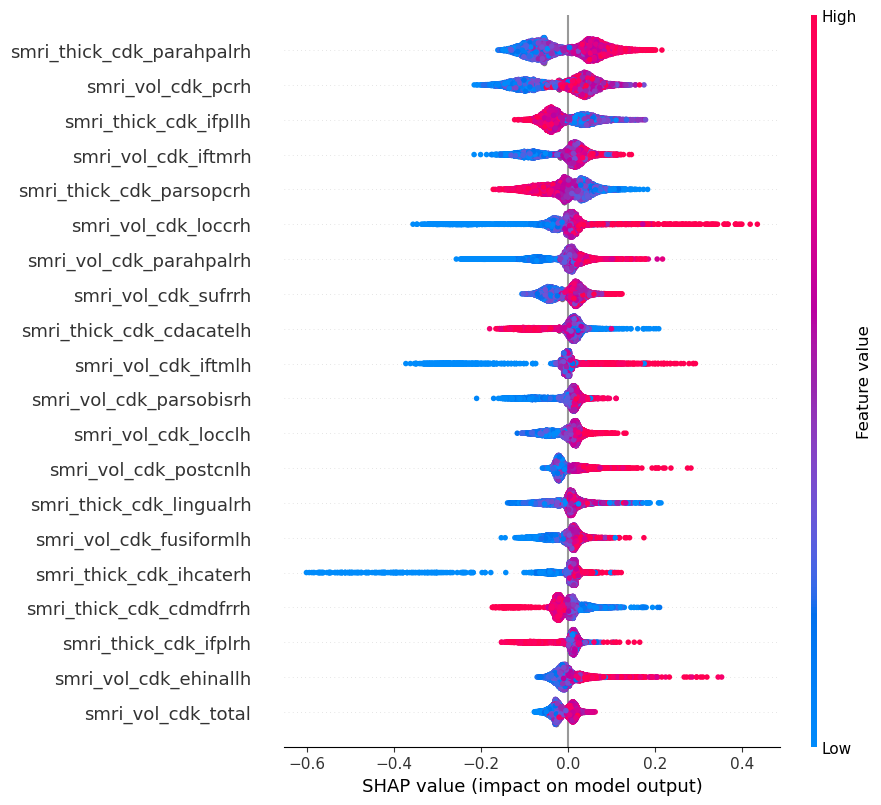

In [14]:
plt.style.use('default')
shap.summary_plot(shap_values, X_display)

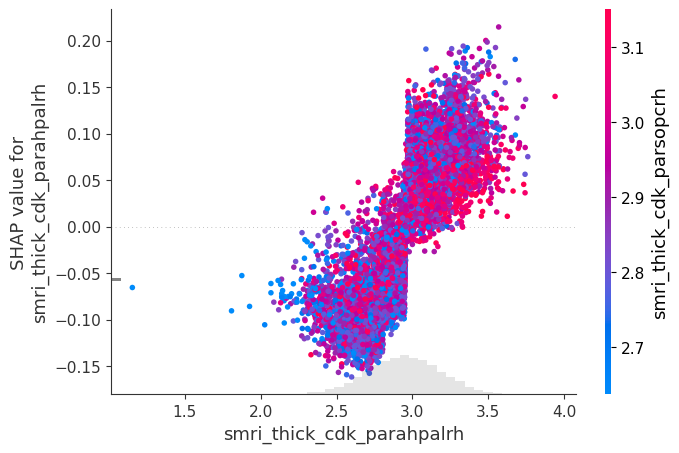

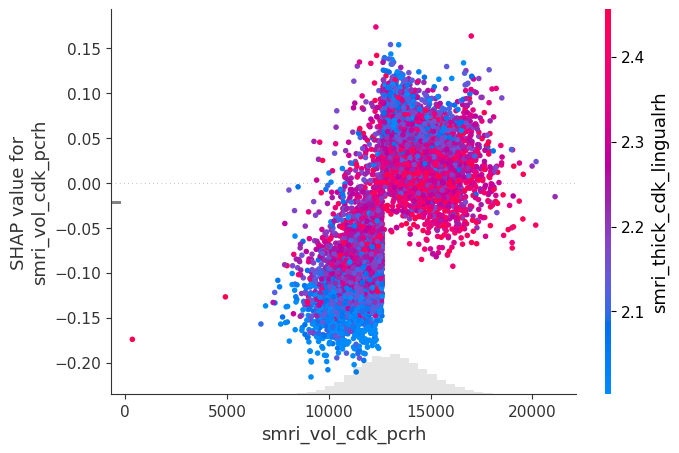

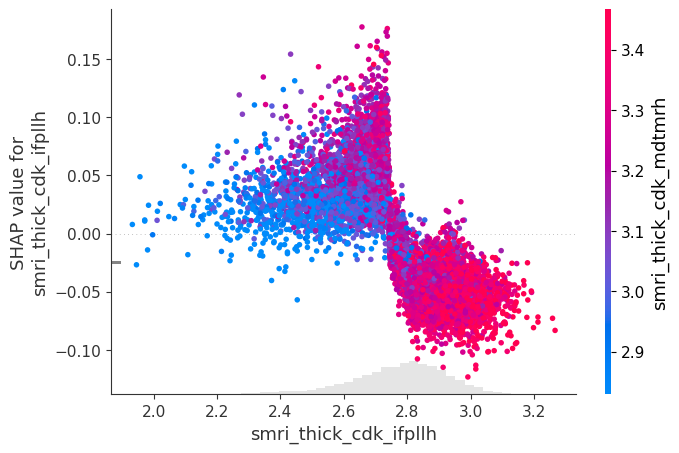

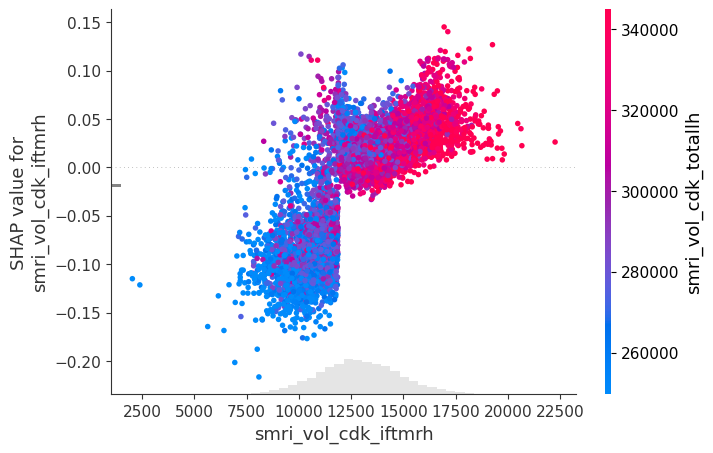

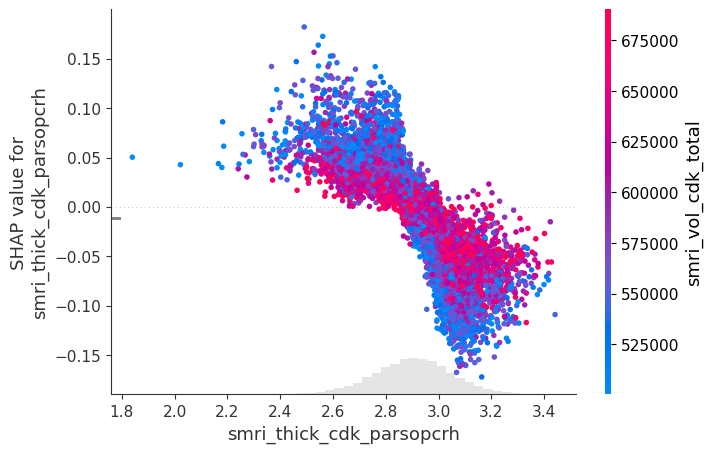

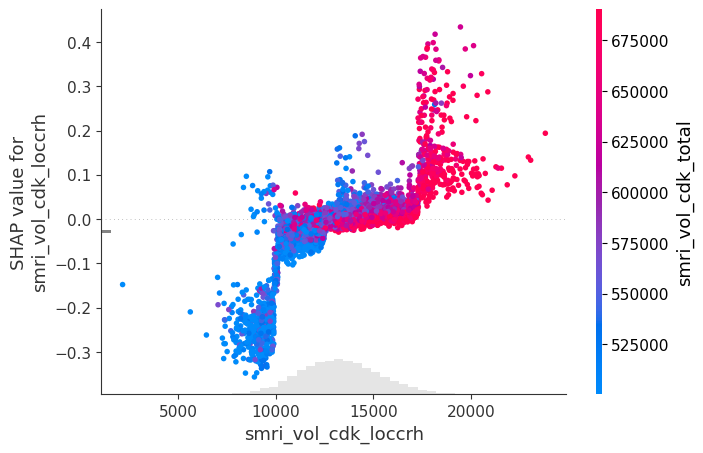

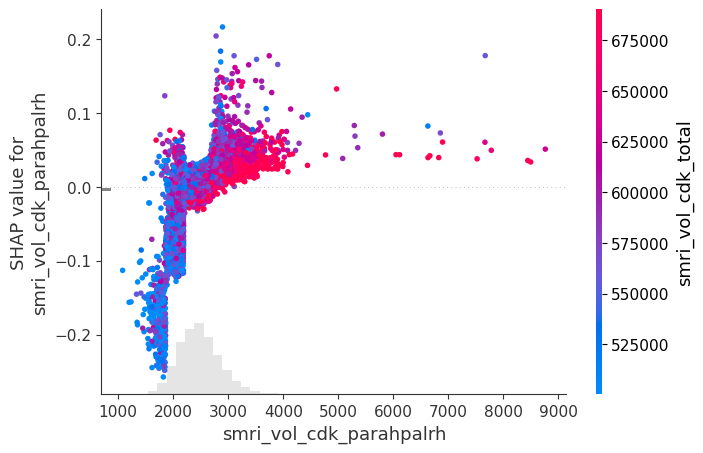

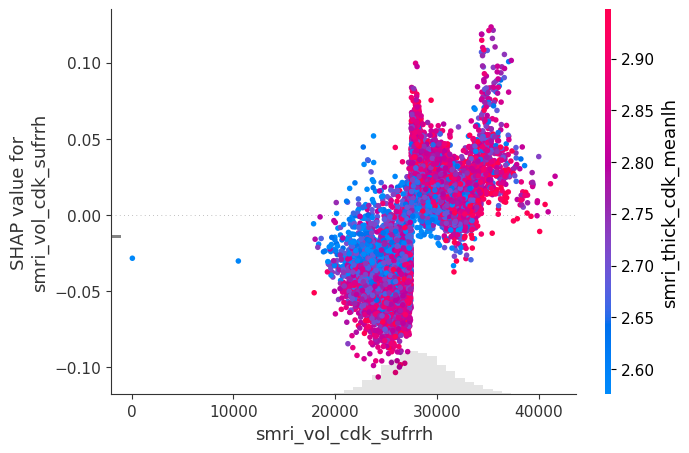

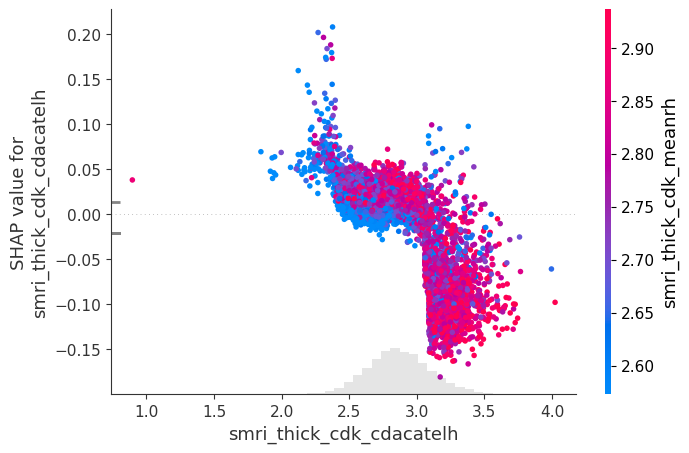

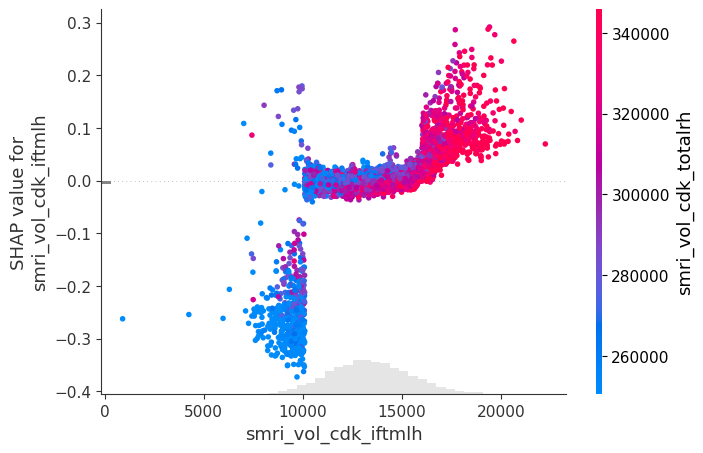

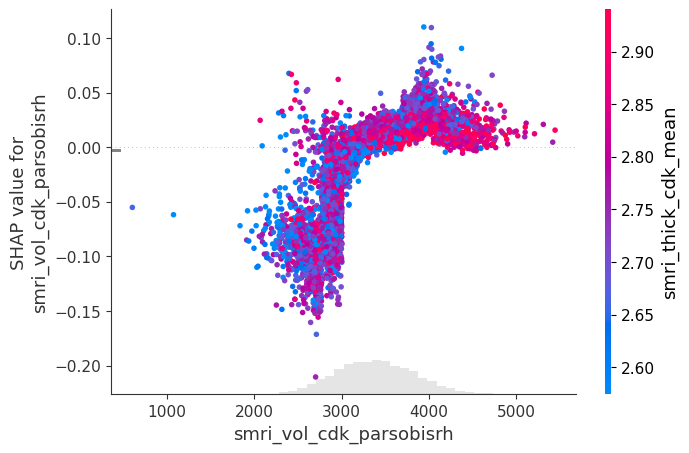

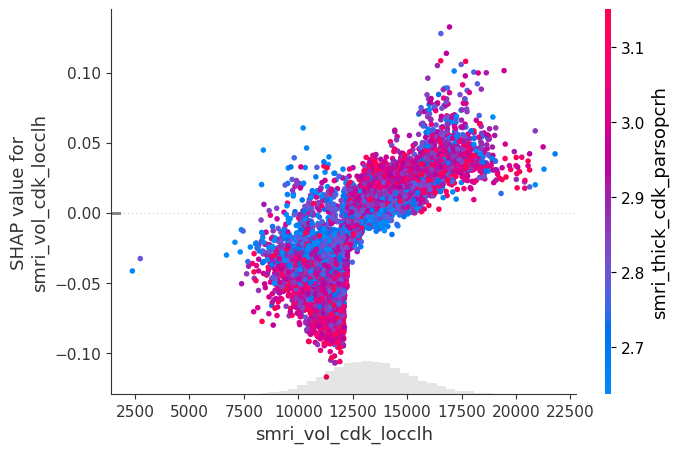

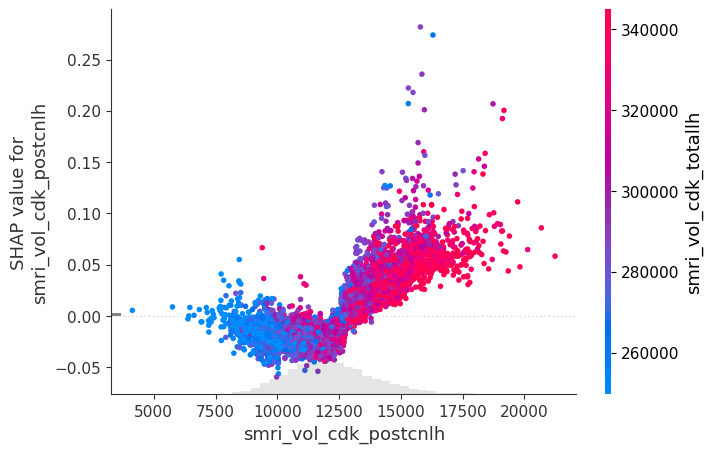

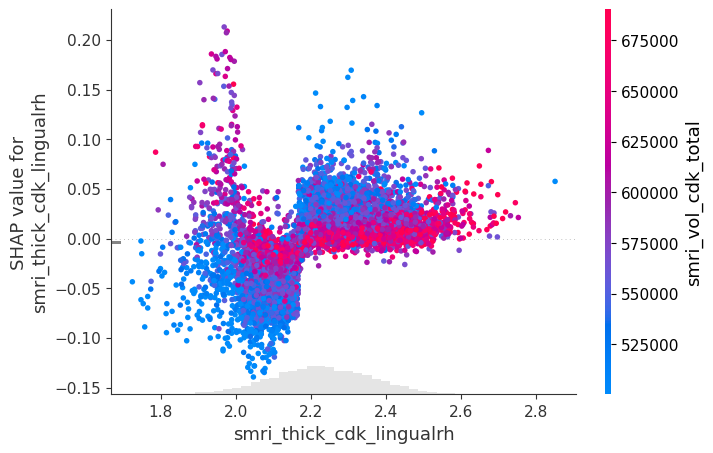

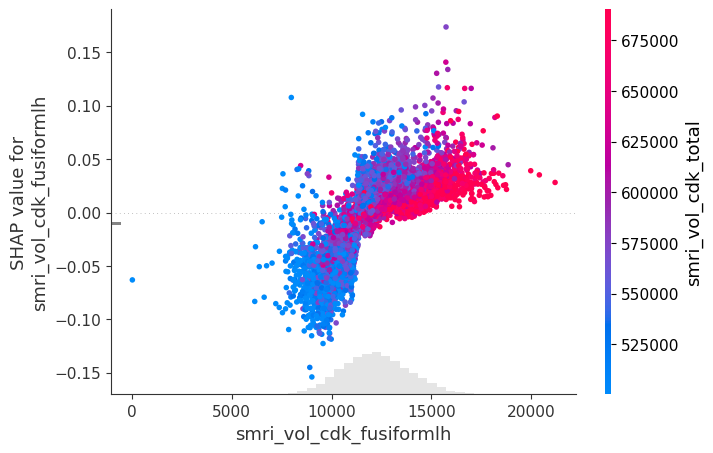

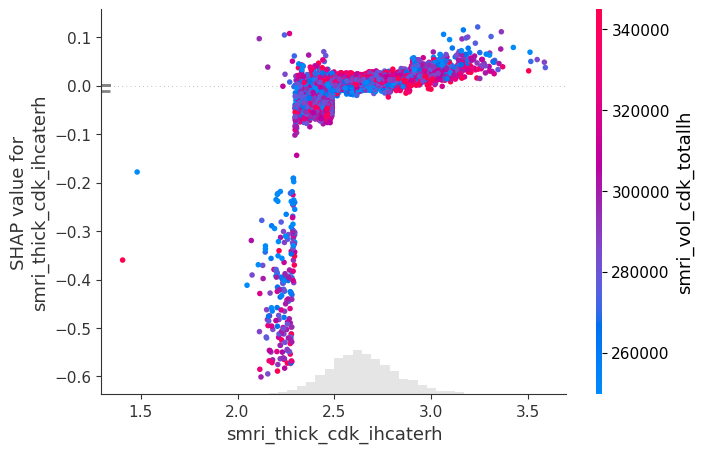

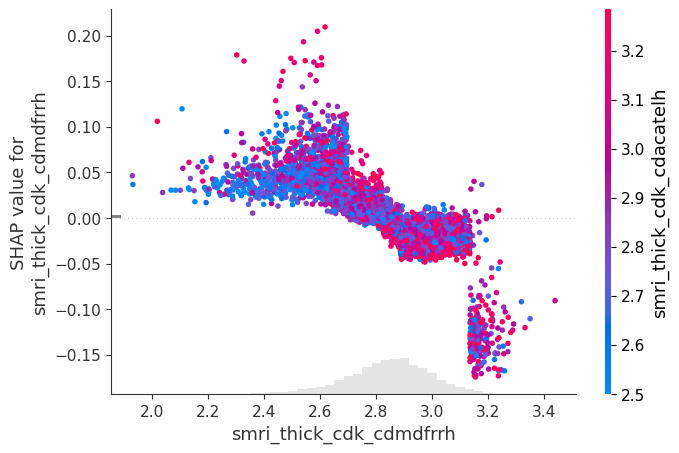

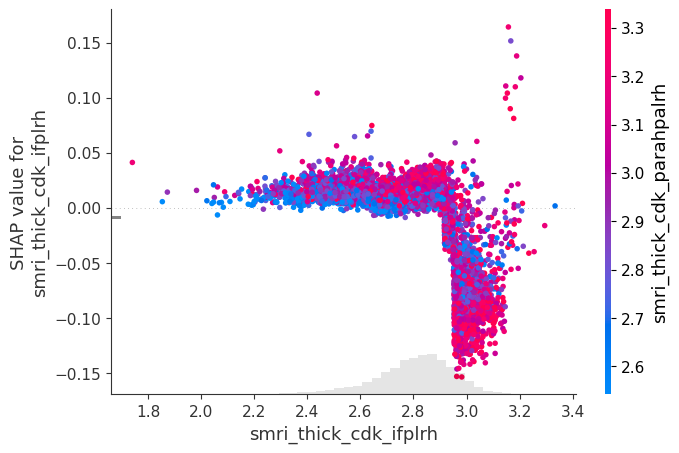

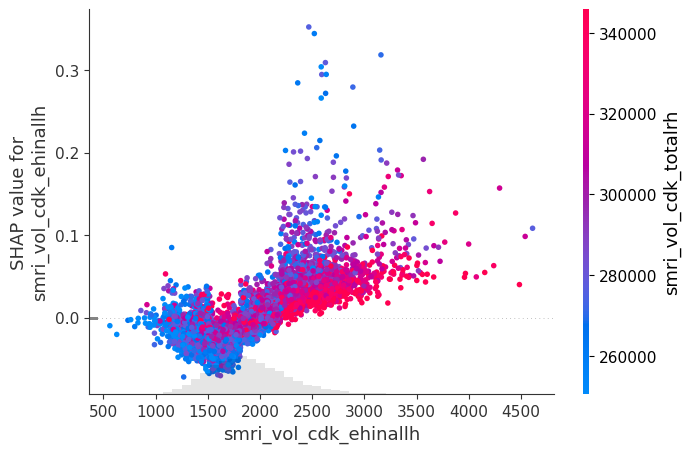

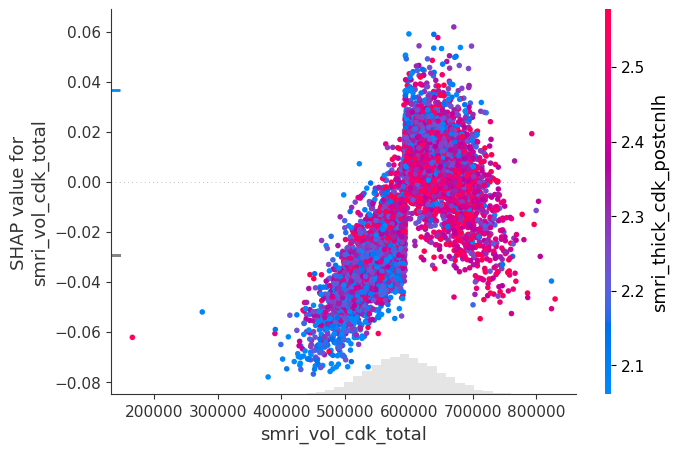

In [15]:
new_api_shap_values = explainer(X)

top_inds = np.argsort(-np.sum(np.abs(new_api_shap_values.values), 0))
for i in range(20):
    shap.plots.scatter(new_api_shap_values[:, top_inds[i]], color=new_api_shap_values)